In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

AUTOTUNE = tf.data.experimental.AUTOTUNE 

In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
image_size = [64,64]
batch_size = 64
epoch = 100

In [7]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    'Alz_data/train/',
#         labels='inferred',
#     label_mode='categorical',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 5121 files belonging to 4 classes.
Using 4097 files for training.


In [8]:
class_names = train_data.class_names

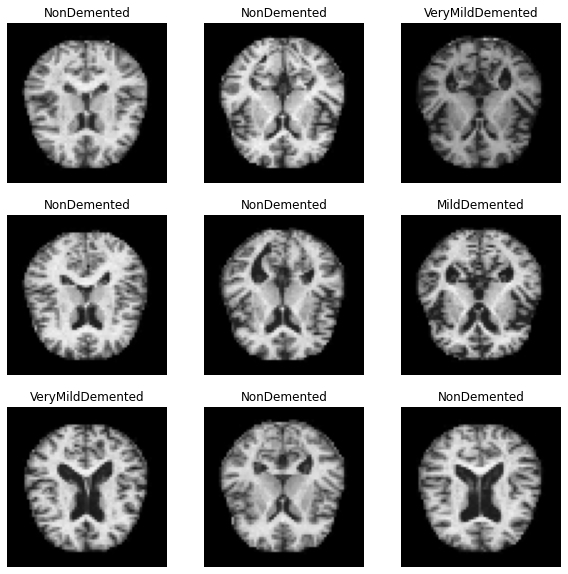

In [19]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(train_data.class_names[labels[i]])
    plt.axis("off")

In [33]:
for images, labels in train_data.class_names[labels[i]]:
    print(labels)


InvalidArgumentError: slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

In [24]:
for images, labels in train_data:
    print(labels)

tf.Tensor(
[3 2 3 2 2 2 2 2 2 2 1 2 0 2 3 2 2 3 2 2 3 0 0 1 2 2 3 2 3 2 0 2 3 2 3 2 3
 3 2 2 2 2 2 3 2 2 3 0 3 2 2 3 3 3 3 3 3 3 2 3 2 0 2 0], shape=(64,), dtype=int32)
tf.Tensor(
[2 2 2 2 2 2 0 0 2 2 2 2 1 2 3 2 2 2 2 3 3 0 2 2 3 0 0 3 2 2 0 0 0 3 3 3 2
 0 2 0 2 3 3 0 3 3 0 3 3 0 2 2 2 2 2 2 2 2 2 2 2 3 2 2], shape=(64,), dtype=int32)
tf.Tensor(
[3 0 0 3 3 2 2 3 0 0 2 0 2 0 2 0 0 3 0 2 2 3 3 2 2 2 3 3 3 3 2 3 0 3 0 2 0
 3 0 3 3 2 2 2 2 2 2 2 0 2 2 2 2 2 2 3 2 2 3 3 3 3 0 2], shape=(64,), dtype=int32)
tf.Tensor(
[3 3 2 2 3 3 2 0 3 2 3 2 3 3 3 3 3 0 0 0 2 3 0 2 3 2 3 3 2 3 3 2 3 2 2 0 2
 2 2 2 2 2 3 2 0 3 3 3 2 2 2 3 3 2 3 2 2 2 3 2 2 0 3 3], shape=(64,), dtype=int32)
tf.Tensor(
[0 2 2 2 2 3 2 0 2 2 2 3 2 2 3 3 3 2 2 2 2 0 3 0 3 3 2 2 3 2 3 3 2 0 3 3 2
 2 3 3 3 2 2 3 2 2 2 2 3 3 0 1 2 0 2 3 3 0 2 2 2 0 2 3], shape=(64,), dtype=int32)
tf.Tensor(
[2 3 0 2 3 0 2 3 2 2 2 0 2 2 2 3 3 3 3 3 2 2 2 2 0 3 2 3 2 2 2 2 3 2 2 2 0
 3 3 2 2 2 0 3 3 2 2 2 2 3 2 2 2 2 3 3 3 2 2 0 3 2 3 3], shape=(64,),

tf.Tensor(
[2 2 0 3 3 2 3 2 2 2 3 3 0 0 3 2 3 3 0 2 2 3 0 2 2 3 2 2 3 3 2 0 3 2 0 3 3
 0 3 3 0 2 2 2 3 3 2 2 2 3 3 0 0 0 2 3 2 2 0 3 2 2 2 3], shape=(64,), dtype=int32)
tf.Tensor(
[2 2 2 2 2 2 3 2 2 2 3 0 2 2 2 3 2 2 3 2 3 2 0 3 2 3 2 3 2 2 0 3 2 3 2 0 3
 3 3 2 0 2 2 2 2 2 2 0 3 2 0 3 0 2 3 2 2 3 3 2 2 3 1 0], shape=(64,), dtype=int32)
tf.Tensor(
[2 2 2 2 3 2 2 3 3 3 2 2 2 2 3 2 3 3 3 2 3 0 0 0 0 2 3 0 3 2 2 3 2 3 2 3 3
 3 0 3 3 3 2 2 2 2 3 0 2 2 2 3 0 3 3 3 2 0 2 2 3 2 2 3], shape=(64,), dtype=int32)
tf.Tensor(
[2 0 2 2 2 3 3 2 3 2 0 3 2 3 0 3 2 3 3 2 2 2 3 0 3 0 0 3 3 2 3 2 0 3 2 0 2
 2 3 2 2 2 2 3 2 3 2 2 2 0 0 3 2 0 2 0 0 3 2 2 2 3 2 2], shape=(64,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)


In [13]:
train_data.class_names[labels[i]]

NameError: name 'labels' is not defined

In [37]:
class_names = ['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']
train_data.class_names = class_names
# val_data.class_names = class_names

NUM_CLASSES = len(class_names)

In [38]:
class_names

['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [39]:
def one_hot_label(image, label):
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

train_data = train_data.map(one_hot_label, num_parallel_calls=AUTOTUNE)
# val_data = val_data.map(one_hot_label, num_parallel_calls=AUTOTUNE)

In [40]:
class_names

['MildDementia', 'ModerateDementia', 'NonDementia', 'VeryMildDementia']

In [41]:
for label in class_names:
    print(label)

MildDementia
ModerateDementia
NonDementia
VeryMildDementia
